<a href="https://colab.research.google.com/github/wyctorfogos/wyctorfogos/blob/main/Mean_Shift_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center>Mini Clustering Project</center></h1>
# <h2><center><b>- Mean shift Algorithme -</b></center></h2>
# <h4><center>Kim Suyeon, Terki Anis, Wyctor Fogos da Rocha, Norelhouda Saidouche</center></h4>

<h4>Meanshift est un algorithme de clustering qui attribue les points de données aux clusters de manière itérative en décalant les points vers le mode. Le mode peut être compris comme la plus forte densité de points de données dans une certaine région . 

<h4>C’est pour cela que cet algorithme est également connu sous le nom d'algorithme de recherche de mode. 

<h4>Étant donné un ensemble de point, l'algorithme attribue itérativement chaque point de données vers le point de gravité du cluster le plus proche.

<h4>La direction vers le centroïde du cluster le plus proche est déterminée par l'endroit où se trouvent la plupart des points à proximité (la densité de points est élevée). 

<h4>Ainsi, à chaque itération, chaque point de données se rapprochera de l'endroit où se trouvent le plus de points, ce qui est ou conduira au centre du cluster. Lorsque l'algorithme s'arrête, chaque point est affecté à un cluster.

<h4>Pour rentrer un peu plus dans les détails, le mean shift trouve pour chaque point de données $x_{i} ∈ X$ les points voisins $N(x)$ ensuite on calcule le vecteur mean shift $m(x)$pour chaque point voisin ce qui donne :

<br><center> 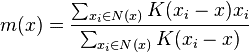
</center><br> Avec : <br>
$x$ : le centroide actuel <br>
$x_{i}$ : les points de données dans un rayon de la fenêtre <br>
$N(x)$ : la fonction qui détermine les voisin de $x$ dans un certain rayon<br>
$K(x-x_{i})$ : la fonction kernel qui détermine les poids des points voisins (elle est généralement gaussienne)


<h3>L’algorithme du mean shift est assez simple et peut se résumer en quelques étapes : <br>

1.   Initialiser un point aléatoire (le centroide initial) noté $x$ avec une certaine fenêtre $W$ (la fenêtre $W$ possède un rayon $r$ qui est lui déterminé par l’utilisateur)<br>
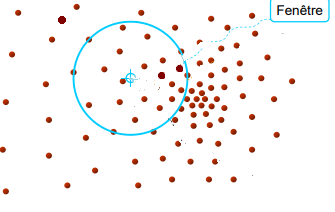
2.   Calculer le centre de gravité (le mean) de la fenêtre $W$<br>
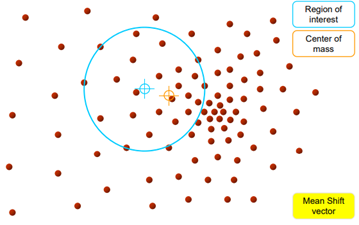
3.   Décaler notre fenêtre vers ce nouveau point<br>
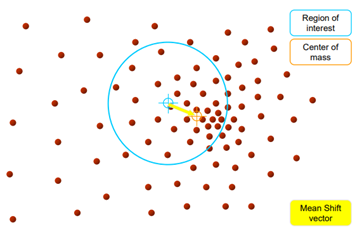
4. Retrouner à l’étape 2 jusqu’à convergence vers un minimum local<br>
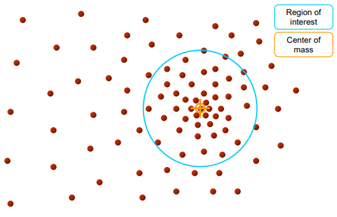



L'image suivante montre comment la fenêtre converge vers un minimum local.

<img src="https://i.makeagif.com/media/4-07-2015/zOZVui.gif" width="400">

Cette image représente chaque itération pour créer les clusters.

<img src="https://cdn-images-1.medium.com/max/640/1*vyz94J_76dsVToaa4VG1Zg.gif" width="400">

#Exemples

L'une des applications les plus répandues de cette méthode est le traitement des images, car elle permet d'accentuer les contours.


**Segmentation d'image**

L'objectif général de la segmentation d'image est de diviser une image en régions sémantiquement significatives, à travers du regroupement (clustering) des pixels de l'image. 
Considérez la photo ci-dessous que a grande variation de couleur.

<img src="https://spin.atomicobject.com/wp-content/uploads/mean_shift_image.jpg" width="400">

Pour mieux comprendre, il est nécessaire de représenter les valeurs des pixels de l'image par des points dans un espace 3D  (RGB - Red, Green and Blue).
Dans le gif ci-dessous, vous pouvez voir le processus de regroupement des couleurs.  

<img src="https://spin.atomicobject.com/wp-content/uploads/ms_3d_image_animation.gif" width="400">

Le résultat final du processus est représenté par l'image ci-dessous, où les pixels sont regroupés en sept régions (clusters).

<img src="https://spin.atomicobject.com/wp-content/uploads/mean_shift_image_clustered.png" width="400">

<center><h2><b>IRIS Data

In [ ]:
# Import Library
%matplotlib inline
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
import keras
import time
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from matplotlib import style
from sklearn.datasets.samples_generator import make_blobs
from sklearn.decomposition import PCA
import time
import cv2
import collections
import seaborn as sns
from skimage import filters
from skimage import util
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import Iris Dataset
data=datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Import dataset and labels
x_origin = data.data
y = data.target   # 150 labels = 50 + 50 + 50

Cette base de données dispose des valeurs de trois types de fleurs différentes et de ses caractéristiques

In [ ]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
3,4.6,3.1,1.5,0.2,0
59,5.2,2.7,3.9,1.4,1
140,6.7,3.1,5.6,2.4,2
14,5.8,4.0,1.2,0.2,0
32,5.2,4.1,1.5,0.1,0


Comme la base de données sont composées de 4 variables, PCA est utilisé pour réduire les données en 2 dimension.

In [ ]:
# PCA to Iris Data
pca = PCA(n_components=2)
pca.fit(x_origin)
x = pca.transform(x_origin)

Text(0, 0.5, 'F2')

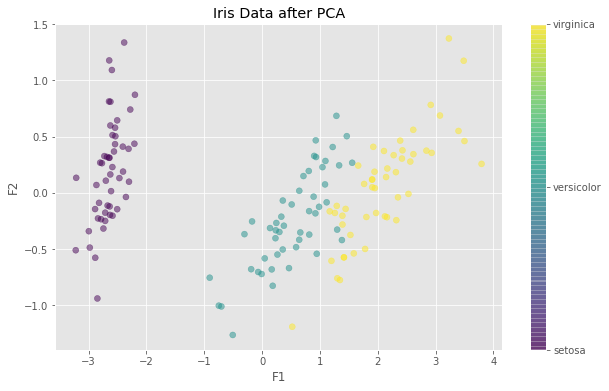

In [ ]:
# Plot Iris Data
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c = y,alpha= 0.5)
formatter = plt.FuncFormatter(lambda i, *args: data.target_names[int(i)])
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.title('Iris Data after PCA')
plt.xlabel('F1')
plt.ylabel('F2')

# Plot Iris Data after K-Means

Processus de clustering - K Means

--- 0.03668403625488281 seconds ---
Centroid - K Means
[[ 2.34652659  0.27393856]
 [-2.64241546  0.19088505]
 [ 0.66567601 -0.3316042 ]]


Text(0, 0.5, 'F2')

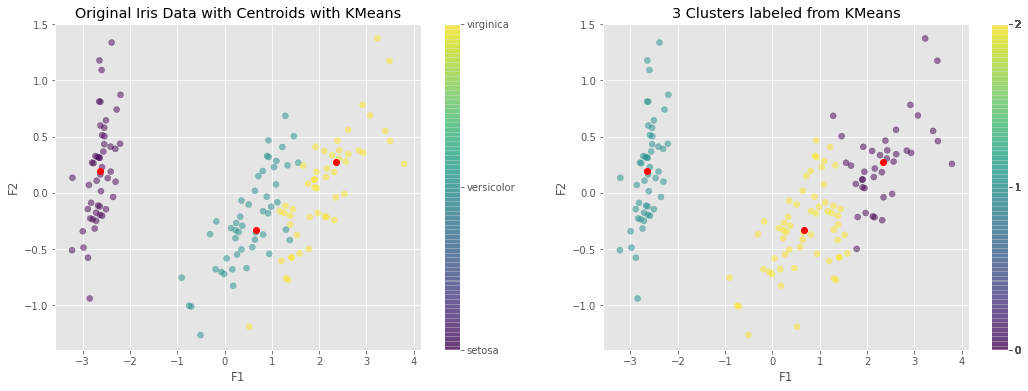

In [ ]:
# Measurer le temps d'execution Avec KMeans
start_time = time.time()

# Clustering Avec KMeans
clf_kmean = KMeans(n_clusters=3)
clf_kmean.fit(x)
t_k = time.time() - start_time
print("--- %s seconds ---" % (t_k))

# Centroide de KMeans
centroid = clf_kmean.cluster_centers_
print("Centroid - K Means")
print(centroid)
lbl_k = clf_kmean.labels_

# Plot Iris Data after KMEANS
plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.scatter(x[:,0],x[:,1],c = y,alpha= 0.5)
plt.plot(centroid[:,0],centroid[:,1],'ro')    # Plot centroid of Sepal
formatter = plt.FuncFormatter(lambda i, *args: data.target_names[int(i)])
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.title('Original Iris Data with Centroids with KMeans')
plt.xlabel('F1')
plt.ylabel('F2')

# Plot Iris Data after KMEANS
plt.subplot(1, 2, 2)
plt.scatter(x[:,0],x[:,1],c = lbl_k,alpha= 0.5)
plt.plot(centroid[:,0],centroid[:,1],'ro')    # Plot centroid of Sepal
plt.colorbar(ticks=lbl_k)
plt.title('3 Clusters labeled from KMeans')
plt.xlabel('F1')
plt.ylabel('F2')


# Plot Iris Data after Meanshift

Processus de clustering - Mean Shift

--- 0.49414920806884766 seconds ---
Centroid - Mean Shift
[[ 1.17642311 -0.12033282]
 [-2.64344511  0.19056564]]


Text(0, 0.5, 'F2')

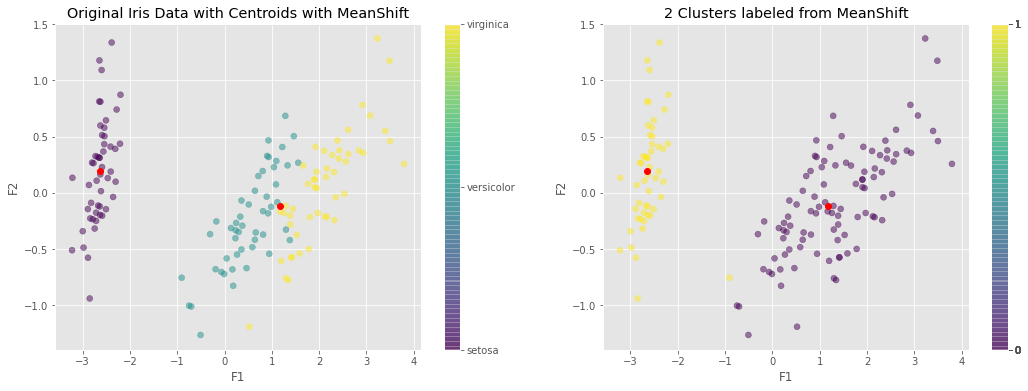

In [ ]:
# Measurer le temps d'execution Avec Meanshift
start_time = time.time()

# Clustering Avec Meanshift
bandwidth = estimate_bandwidth(x, quantile=0.3)
                               #,n_samples=30)
clf_meanshift = MeanShift(bandwidth=bandwidth)
clf_meanshift.fit(x)   
t_m = time.time() - start_time               
print("--- %s seconds ---" % (t_m))      


# Centroides de Meanshift
centroid_meanshift = clf_meanshift.cluster_centers_       
print("Centroid - Mean Shift")
print(centroid_meanshift)
lbl_m = clf_meanshift.labels_

# Plot Iris Data after Meanshift
plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)
plt.scatter(x[:,0],x[:,1],c = y,alpha= 0.5)
plt.plot(centroid_meanshift[:,0],centroid_meanshift[:,1],'ro')    # Plot centroid of Sepal
formatter = plt.FuncFormatter(lambda i, *args: data.target_names[int(i)])
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.title('Original Iris Data with Centroids with MeanShift')
plt.xlabel('F1')
plt.ylabel('F2')

# Plot Iris Data after MEANSHIFT
plt.subplot(1, 2, 2)
plt.scatter(x[:,0],x[:,1],c = lbl_m,alpha= 0.5)
plt.plot(centroid_meanshift[:,0],centroid_meanshift[:,1],'ro')    # Plot centroid of Sepal
plt.colorbar(ticks=lbl_m)
plt.title('2 Clusters labeled from MeanShift')
plt.xlabel('F1')
plt.ylabel('F2')

#Comparaison des temps d'exécution

L'algorithme MeanShift étant lourd, il prend plus de temps que le clustering KMean. 

Text(0, 0.5, 'seconds')

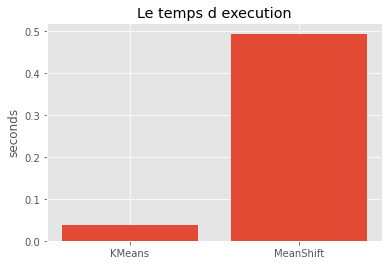

In [ ]:
t = [t_k, t_m]
label = ['KMeans','MeanShift']
plt.figure(figsize=(6,4))
plt.bar(label,t)
plt.title('Le temps d execution')
plt.ylabel('seconds')

# Autre Exemple 

**Présentation des données**

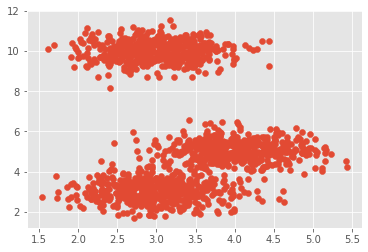

In [ ]:
style.use("ggplot")
centers = [[3,3,3],[4,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 1500, centers = centers, cluster_std = 0.5)
plt.scatter(X[:,0],X[:,1])
plt.show()

<h1><b>Mean Shift 

[[ 2.97425349 10.00386926 10.03339834]
 [ 4.03661213  5.03621953  4.98232114]
 [ 2.99589281  2.99659277  2.97747882]]
Estimated clusters: 3


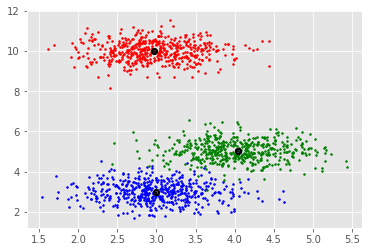

In [ ]:
start = time.time()
bandwidth = estimate_bandwidth(X, quantile=0.3)
ms = MeanShift(bandwidth)
ms.fit(X)
end = time.time()
ms_labels = ms.labels_
cluster_centers1 = ms.cluster_centers_
print(cluster_centers1)
n_clusters_ = len(np.unique(ms_labels))
print("Estimated clusters:", n_clusters_)
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[ms_labels[i]], markersize = 3)
plt.scatter(cluster_centers1[:,0],cluster_centers1[:,1],
    marker=".",color='k', s=20, linewidths = 5, zorder=10)
plt.show()

<h1><b>K-Means

[[ 2.9731307  10.00015203 10.03474164]
 [ 2.99307319  2.99432818  2.98581773]
 [ 4.01895668  5.03664893  4.98379124]]


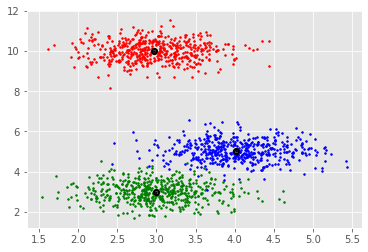

In [ ]:
from sklearn.cluster import KMeans
start1 = time.time()
km = KMeans(n_clusters=3, random_state=0)
km.fit(X)
end1 = time.time()
km_labels = km.labels_
cluster_centers = km.cluster_centers_
print(cluster_centers)
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[km_labels[i]], markersize = 3)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
    marker=".",color='k', s=20, linewidths = 5, zorder=10)
plt.show()

In [ ]:
print("Le temps d'éxecustion de Mean shift est")
print(end - start)
print("Le temps d'éxecustion de Kmeans est")
print(end1 - start1)

Le temps d'éxecustion de Mean shift est
3.380218982696533
Le temps d'éxecustion de Kmeans est
0.029160261154174805


##Comparaison avec Coefficient de Silhouette

une mesure de qualité d'une partition d'un ensemble de données en classification automatique

In [ ]:
# Silhouette score of KMean Clustering = average of Silhouette coefficient for each data
average_score = metrics.silhouette_score(X, ms_labels, metric='euclidean')
print('Silhouette Analysis Score with Mean shift : {:.3f}'.format(average_score))
# Silhouette score of KMean Clustering = average of Silhouette coefficient for each data
average_score1 = metrics.silhouette_score(X, km_labels, metric='euclidean')
print('Silhouette Analysis Score with KMean : {:.3f}'.format(average_score1))

Silhouette Analysis Score with Mean shift : 0.706
Silhouette Analysis Score with KMean : 0.706


#Exemple réel de ségmentation d'Image

In [ ]:
!curl https://miro.medium.com/max/1400/1*LnuC36y0oM83DKBySbPAxQ.jpeg --output imo 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  919k  100  919k    0     0  5256k      0 --:--:-- --:--:-- --:--:-- 5256k


(1470000, 3)


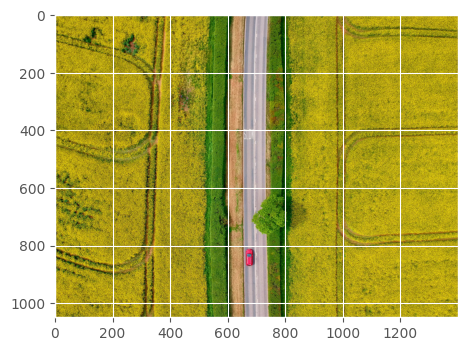

In [ ]:
image = plt.imread("/content/imo")
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
print(pixel_values.shape)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
plt.figure(dpi=100)
plt.imshow(image)
plt.show()

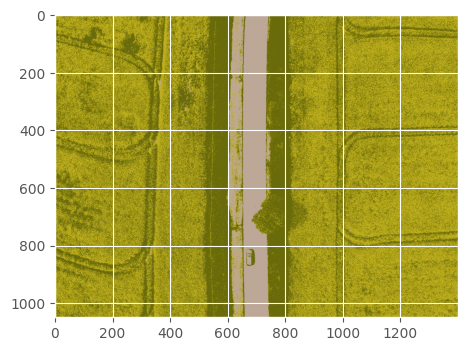

In [ ]:
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.figure(dpi=100)
plt.imshow(segmented_image)
plt.show()

Number of segments:  18


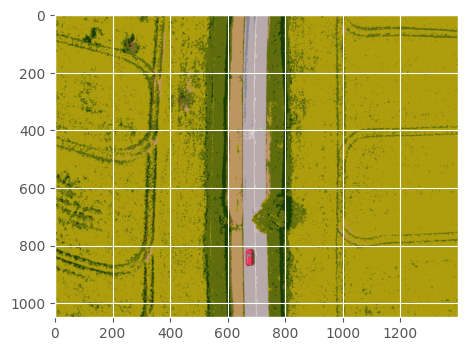

In [ ]:
#img = cv2.imread(r"C:\Users\ITEC\Desktop\im\a2.jpg")
img = plt.imread("/content/imo")
# filter to reduce noise
img = cv2.medianBlur(img, 3)

# flatten the image
flat_image = img.reshape((-1,3))
flat_image = np.float32(flat_image)

# meanshift
bandwidth = estimate_bandwidth(flat_image, quantile=.06, n_samples=3000)
ms = MeanShift(bandwidth, bin_seeding=True)
ms.fit(flat_image)
labeled=ms.labels_


# get number of segments
segments = np.unique(labeled)
print('Number of segments: ', segments.shape[0])
# get the average color of each segment
total = np.zeros((segments.shape[0], 3), dtype=float)
count = np.zeros(total.shape, dtype=float)
for i, label in enumerate(labeled):
    total[label] = total[label] + flat_image[i]
    count[label] += 1
avg = total/count
avg = np.uint8(avg)

# cast the labeled image into the corresponding average color
res = avg[labeled]
result = res.reshape((img.shape))
# load image using cv2....and do processing.
plt.figure(dpi=100)
plt.imshow(result)
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()

**Comparaison entre les deux Algorithmes**

Le Mean Shift et l'algorithme K-Means sont deux algorithmes de clustering similaires; en effet les deux extraient des informations à partir de données avec une sorte d'opérations vectorielles moyennes. Alors que l'algorithme K-Mean est très populaire, l'algorithme de décalage moyen n'a trouvé que des applications limitées (par exemple pour la segmentation d'images.)

<h3><b>Les inconvénients de Mean shift par rapport a Kmeans</b></h3>


1.   Mean shift est assez gourmand en calculs ; il nécessite en général des opérations $O(kN^{2})$ (qui sont principalement des calculs de distance euclidienne), tandis que K Means nécessite $o(kN)$ calcul. 
- $N$ : le nombre de points de données 
- $k$ : le nombre d'étapes d'itération moyennes pour chaque point de données
2.   L'algorithme de décalage moyen repose sur une densité de données suffisamment élevée avec un gradient clair pour localiser les centres de cluster. En particulier, l'algorithme de décalage principal ne parvient souvent pas à trouver les clusters appropriés pour les données aberrantes ou les points de données situés entre les clusters naturels (comme nous avons pu le voir avec les données Iris)
3. Mean shift est lent. En effet, à cause du nombre de calculs effectués, le mean shift n’est généralement pas appliqué aux datasets larges. 



<h3><b>Avantages de l’algorithme Mean Shift</b></h3>

1.   le plus grand avantage de l’algorithme mean shift est que le nombre de clusters n’est pas spécifié, ceci constitue un grande avantage sur l’algorithme K Means puisque le calcul du nombre de clusters est parfois très difficile trouver (dans plusieurs cas on se contente d’un nombre de cluster assez grand sans que celui ci soit optimale)
2.  Mean shift est utilisé pour les données non linéaires complexes, contrairement a K Means qui est incapable de trouver des clusters non convexes 

